In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from time import time

# Fourier transform

The Fourier transform, $\hat{f}(k)$ of a function $f(x)$ can be defined as

$$ \hat{f}(k) = \int_{-\infty}^\infty f(x) \mathrm{e}^{\mathrm{i} kx} \, \mathrm{d}x $$

with the inverse transform defined as

$$ f(x) = \frac{1}{2\pi} \int_{-\infty}^\infty \hat{f}(k) \mathrm{e}^{-\mathrm{i} kx}  \, \mathrm{d}k. $$

Other conventions are also used, so make sure to check the conventions if you use library functions.

## Discrete Fourier Transform (DFT)

In numerical applications, we usually have functions (signals) that are given by samples at discrete intervals. We will assume that the intervals are evenly spaced, with sample spacing $\Delta x$, and that we have $N$ samples given by

$$ f_j = f(x_j), \;\;\; \mathrm{where} \;\;\; x_j = j \Delta x, \;\;\; j = 0, 1, 2, \ldots N-1.$$

The discrete Fourier transform is a discrete approximation of the continuous Fourier transform, which can be used to compute the Fourier transform at the frequencies

$$ k_n = \frac{2 \pi}{\Delta x}\frac{n}{N}, \;\;\; \mathrm{where} \;\;\; n = -\frac{N}{2}, -\frac{N-1}{2}, \ldots, \frac{N-1}{2}, \frac{N}{2}. $$

The continuous Fourier transform can be approximated by a discrete sum:

$$ \hat{f}(k_n) = \int_{-\infty}^\infty f(x) \mathrm{e}^{\mathrm{i} kx} \, \mathrm{d}x \approx \Delta x \sum_{j=0}^{N-1} f_j \mathrm{e}^{\mathrm{i} k_n x_j} = \Delta x \sum_{j=0}^{N-1} f_j \mathrm{e}^{2\pi\mathrm{i} j\frac{n}{N}}. $$

The summation in the above equation is called the Discrete Fourier Transform (DFT):

$$ \hat{f}_n = \sum_{j=0}^{N-1} f_j \mathrm{e}^{2\pi\mathrm{i} j\frac{n}{N}}, $$

which means that $\hat{f}_n = \frac{1}{\Delta x} \hat{f}(k_n)$. The inverse DFT is then given by

$$ f_j = \sum_{n=0}^{N-1} \hat{f}_n \mathrm{e}^{-2\pi\mathrm{i} j\frac{n}{N}}. $$

In [2]:
from scipy.io import wavfile

Samplerate = 44100 Hz


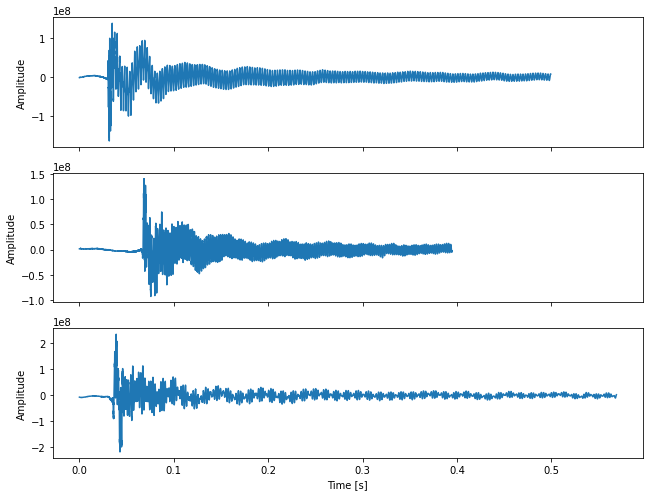

In [3]:
filenames = ['../files/string1.wav', '../files/string2.wav', '../files/two_strings.wav']

signals = []
for filename in filenames:
    samplerate, samples = wavfile.read(filename)
    signals.append(samples)

print(f'Samplerate = {samplerate} Hz')



fig, ax = plt.subplots(nrows = len(signals), figsize = (9, 7), sharex = True)

for i, signal in enumerate(signals):
    # Calculate time coordinates
    t = np.arange(len(signal)) * (1/samplerate)
    ax[i].plot(t, signal)
    ax[i].set_ylabel('Amplitude')
    
ax[-1].set_xlabel('Time [s]')
plt.tight_layout()

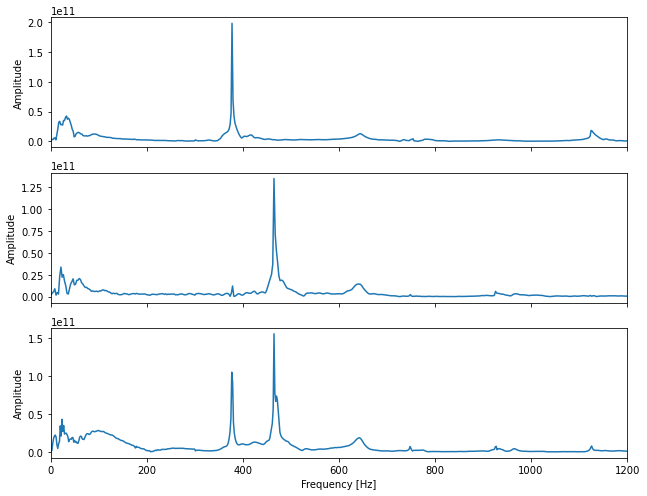

In [4]:
fig, ax = plt.subplots(nrows = len(signals), figsize = (9, 7), sharex = True)

for i, signal in enumerate(signals):
    # Calculate frequency coordinates
    # Note: This is frequencies in Herz (oscillations per second),
    # while in the definitions above we used angular frequency (radians per second).
    N = len(signal)
    freqs = samplerate * np.linspace(-1/2, 1/2, N)
    # The purpose of np.fft.fftshift is simply to re-order the data,
    # such that the frequencies come in the same order as in the definition above.
    # By default, the frequencies are ordered starting from 0 going up,
    # then restarting from the most negative value going up to 0 again.
    fourier = np.fft.fftshift( np.fft.fft(signal) )
    
    ax[i].plot(freqs, np.abs(fourier))
    ax[i].set_ylabel('Amplitude')

ax[-1].set_xlabel('Frequency [Hz]')
ax[-1].set_xlim(0, 1200)
plt.tight_layout()

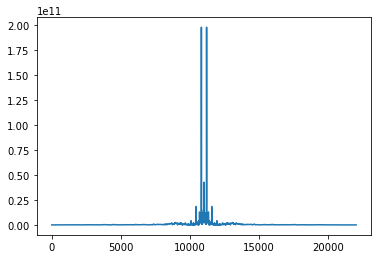

In [5]:
signal = signals[0]
plt.plot(np.abs( np.fft.fftshift( np.fft.fft(signal)) ))

## Geometric interpretation of the DFT as a sum of complex numbers

Component number $n$ of the DFT of a signal $f$ is given by

$$ \hat{f}_n = \sum_{j=0}^{N-1} f_j \mathrm{e}^{2\pi\mathrm{i} j\frac{n}{N}}.$$

We can rewrite the exponential in the sum to be

$$ \left( \mathrm{e}^{2\pi\mathrm{i} \frac{n}{N}} \right)^j, $$

so we see that when we take the sum over $j$ in the DFT, we multiply element $j$ in the signal with the complex number $\mathrm{e}^{2\pi\mathrm{i} \frac{n}{N}}$ to the power $j$. The complex numbers $\mathrm{e}^{2\pi\mathrm{i} \frac{n}{N}}$ all have magnitude 1, and thus lie on the unit circle in the complex plane, so the effect is that we take a weighted sum of each of the elements in the signal, weighted by a "direction" in the complex plane. Exactly what set of directions we choose is determined by $n/N$, hence different Fourier components use different sets of directions.

This is illustrated below, where we plot this geometric interpretation for one of the signals above.

Absolute value of Fourier component 214 (377.066 Hz) = 1.0518e+11


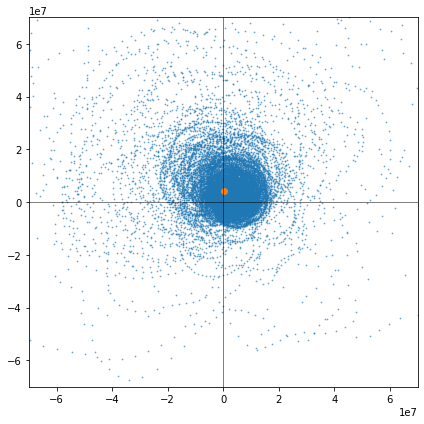

In [6]:
signal = signals[2]
N = len(signal)
freqs = samplerate * np.linspace(-1/2, 1/2, N)


# Calculate the n'th Fourier component
# Try a few different values of N, including n = 214 and 264
n = 214

C = signal*np.exp(1j*2*np.pi*np.arange(N)*((n)/N))

fig = plt.figure(figsize = (6,6))
plt.scatter(C.real, C.imag, marker = '.', s = 3, alpha = 0.5)
plt.scatter(np.mean(C.real), np.mean(C.imag))
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
w = 7e7
plt.xlim(-w, w)
plt.ylim(-w, w)
plt.tight_layout()

print(f'Absolute value of Fourier component {n} ({np.fft.ifftshift(freqs)[n]:.3f} Hz) = {np.abs(np.sum(C)):.4e}')

## Time complexity of calculating the DFT

Component number $n$ of the DFT of a signal $f$ is given by

$$ \hat{f}_n = \sum_{j=0}^{N-1} f_j \mathrm{e}^{2\pi\mathrm{i} j\frac{n}{N}}.$$

Since there are $N$ terms in the full DFT, and since each term requires a sum over $N$ elements, we would naïvely expect that the time to compute the DFT is $\mathcal{O}(N^2)$.

However, it is possible to make it much faster than than, by using a clever algorithm known as the Fast Fourier Transform (FFT). The essence of the algorithm is to split a Fourier transform of a signal of length $N$ into two operations on arrays of length $N/2$, and do this recursively until you have $N$ arrays of length 1, and then build back up in a way that produces the full DFT. The runtime of this algorithm is only $\mathcal{O}(N \log(N))$, which is much, much faster for large $N$.

Since variants of this algorithms are som commonly used, FFT and DFT are often treated as synonyms. For example, `np.fft.fft` calculates the DFT, using the FFT-algorithm.



In [7]:
def DFT(signal):
    N = len(signal)
    # Precalculate the complex numbers that we will need
    # Using -i here to match the definition in np.fft.fft
    factors = np.exp(-1j*2*np.pi*np.arange(N)/N)
    # Use a list comprehension to take the sum N times
    j = np.arange(N)
    fourier = [np.sum(signal*factors[(n*j)%N]) for n in range(N)]
    return np.array( fourier )

def FFT(signal):
    # Recursive function implementing the Cooley-Tukey FFT algorithm
    # https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm
    N = len(signal)
    if N == 1:
        # At the end of the recursion, just return the same array (of length 1)
        return signal
    else:
        # Implementing this for signal where the length is a power of 2
        # (other lengths are also possible, but the implementation is more complicated)
        assert N % 2 == 0
        fourier = np.empty(N, dtype = np.complex128)
        # defining N/2 for convenience
        Nhalf = int(N/2)
        fourier[:Nhalf] = FFT(signal[::2])
        fourier[Nhalf:] = FFT(signal[1::2])
        for n in range(Nhalf):
            tmp = fourier[n]
            fourier[n]         = tmp + np.exp(-1j*2*np.pi*(n/N)) * fourier[n + Nhalf]
            fourier[n + Nhalf] = tmp - np.exp(-1j*2*np.pi*(n/N)) * fourier[n + Nhalf]
    return fourier

DFT equal to FFT:  True
DFT equal to np.fft.fft:  True


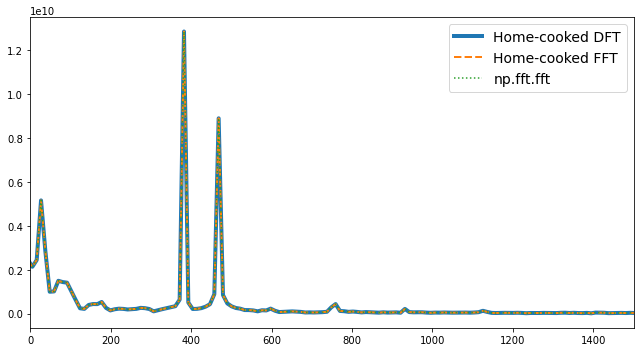

In [8]:
# Take only a subset of the signal, else this takes too long
signal = signals[2][20000 : 20000 + 2**12]
N = len(signal)
freqs = samplerate * np.linspace(-1/2, 1/2, N)


fig = plt.figure(figsize = (9, 5))

# Plot the DFT, using np.fft.fftshift to change the order
# to match the frequencies
plt.plot(freqs, np.abs(np.fft.fftshift(DFT(signal))), lw = 4, label  = 'Home-cooked DFT')
plt.plot(freqs, np.abs(np.fft.fftshift(FFT(signal))), '--', lw = 2, label  = 'Home-cooked FFT')
# Plot the numpy implementation for comparison
plt.plot(freqs, np.abs(np.fft.fftshift(np.fft.fft(signal))), ':', lw = 1.5, label = 'np.fft.fft')
plt.xlim(0, 1500)
plt.legend(fontsize = 14)
plt.tight_layout()

# Confirm that our implementation produces the same result as the numpy implementation
print('DFT equal to FFT: ', np.allclose(DFT(signal), FFT(signal)))
print('DFT equal to np.fft.fft: ', np.allclose(DFT(signal), np.fft.fft(signal)))

## Comparing runtime of the FFT and DFT implementations

In [9]:
# Do some timing, for different signal lengths
Ns = np.array( [2**i for i in range(8, 17)])

DFT_runtimes = np.zeros(len(Ns))
FFT_runtimes = np.zeros(len(Ns))

for i, N in enumerate(Ns):
    # Just generate a random signal
    signal = np.random.random(N)
    # Measure runtime of DFT
    tic = time()
    fourier = DFT(signal)
    toc = time()
    DFT_runtimes[i] = toc - tic
    # Measure runtime of FFT
    tic = time()
    fourier = FFT(signal)
    toc = time()
    FFT_runtimes[i] = toc - tic

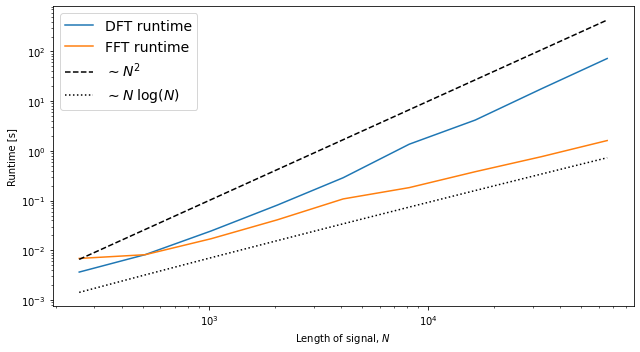

In [10]:
fig = plt.figure(figsize = (9, 5))
plt.plot(Ns, DFT_runtimes, label = 'DFT runtime')
plt.plot(Ns, FFT_runtimes, label = 'FFT runtime')

plt.plot(Ns, 1e-7*Ns**2, '--', c = 'k', label = '$\sim N^2$')
plt.plot(Ns, 1e-6*Ns*np.log(Ns), ':', c = 'k', label = '$\sim N \; \log(N)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Length of signal, $N$')
plt.ylabel('Runtime [s]')
plt.legend(fontsize = 14)
plt.tight_layout()

## The Nyquist-Shannon sampling theorem

If a continuous function, $f(x)$, is sampled at regular intervals $\Delta x$, and $f(x)$ is *bandwidth limited* to frequencies $k$ such that $|k| < k_c$ for $k_c = \pi/\Delta x$, then $f(x)$ can be completely reconstructed from the samples.

Nyquist =  2.9


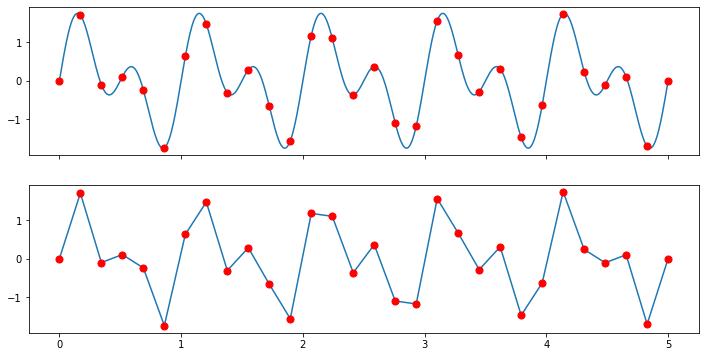

In [11]:
## Critical sampling

# Define a signal with oner or more different frequency components
def f(x, freqs):
    signal = np.zeros(len(x))
    for freq in freqs:
        signal += np.sin(2*np.pi*freq * x)
    return signal


# Define the frequencies in the signal
# Try adding a frequency above the Nyquist frequency
freqs = [1, 2]

# Vector to define the "sampling points"
x1 = np.linspace(0, 5, 30)
# Calculate Nyquist frequency
print('Nyquist = ', 1/(2*(x1[1] - x1[0])))

# Sample the signal
samples = f(x1, freqs)


# Create two subfigures, with same scale on x and y axes
fig, ax = plt.subplots(nrows = 2, figsize = (12, 6), sharey = True, sharex = True)
# Plot the function, with sampling points marked
# Vector to plot the function in high resolution
xc = np.linspace(0, 5, 1000)
ax[0].plot(xc, f(xc, freqs), zorder = 0)

# Plot the samples
ax[0].scatter(x1, samples, marker = 'o', c = 'r', s = 50, zorder = 1)

# Plot the function that results from just using the sampling points.
# By sampling at too large intervals, we get aliasing.
ax[1].plot(x1, f(x1, freqs), zorder = 0)
ax[1].scatter(x1, f(x1, freqs), marker = 'o', c = 'r', s = 50, zorder = 1)

### Same illustration as above, but with more proper reconstruction of the signal from the Fourier series

Nyquist =  3.0
Largest imaginary term (np.amax(np.abs(reconstructed.imag))) =  3.165870343657673e-16


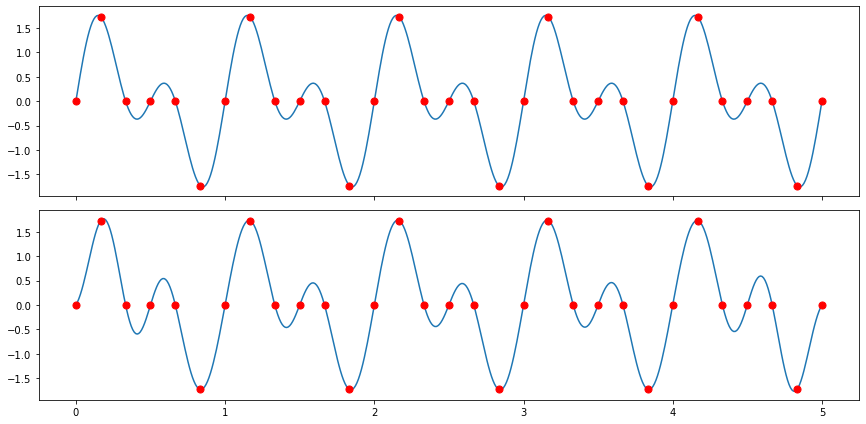

In [12]:
## Critical sampling

# Define a signal with oner or more different frequency components
def f(x, freqs):
    signal = np.zeros(len(x))
    for freq in freqs:
        signal += np.sin(2*np.pi*freq * x)
    return signal

# Define the frequencies in the signal
# Try adding a frequency above the Nyquist frequency
freqs = [1, 2]

# Vector to define the "sampling points"
x1, dx = np.linspace(0, 5, 31, retstep = True)
# Calculate Nyquist frequency
print('Nyquist = ', 1/(2*(x1[1] - x1[0])))

# Sample the signal
samples = f(x1, freqs)
fourier = np.fft.fft(samples)

# Reconstruct signal by adding up the Fourier series
# Vector to plot the function in high resolution
xc = np.linspace(0, 5, 500)
reconstructed = np.zeros(len(xc), dtype = np.complex128)
for fo, freq in zip(fourier, np.fft.fftfreq(len(samples), dx)):
    reconstructed += fo*np.exp(1j*2*np.pi*freq*xc) / len(samples)

# Create two subfigures, with same scale on x and y axes
fig, ax = plt.subplots(nrows = 2, figsize = (12, 6), sharey = True, sharex = True)
# Plot the function, with sampling points marked
# Vector to plot the function in high resolution
ax[0].plot(xc, f(xc, freqs), zorder = 0)

# Plot the samples
ax[0].scatter(x1, samples, marker = 'o', c = 'r', s = 50, zorder = 1)

# Plot the function that results from just using the sampling points.
# By sampling at too large intervals, we get aliasing.
ax[1].plot(xc, reconstructed.real, zorder = 0)
ax[1].scatter(x1, f(x1, freqs), marker = 'o', c = 'r', s = 50, zorder = 1)
plt.tight_layout()

# The imaginary terms should in principle cancel to zero,
# since we start with a purely real signal
print('Largest imaginary term (np.amax(np.abs(reconstructed.imag))) = ', np.amax(np.abs(reconstructed.imag)))

## Aliasing

If we take the Fourier transform of a signal that contains frequency components *above* the critical frequency, then those components of the signal will appear in the Fourier transform, but "aliased" to lower frequencies.

Nyquist =  1800.0


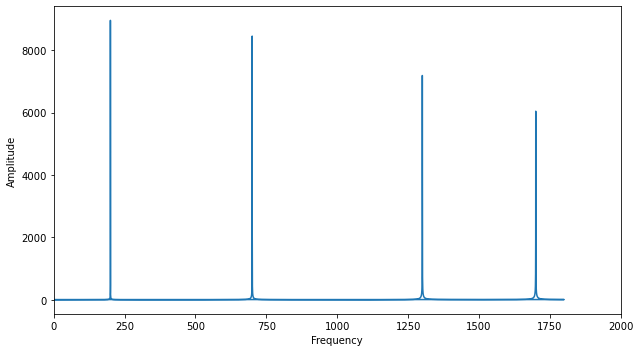

In [13]:
## Aliasing

## Critical sampling

# Define a signal with oner or more different frequency components
def f(x, freqs):
    signal = np.zeros(len(x))
    for freq in freqs:
        signal += np.sin(2*np.pi*freq * x)
    return signal


# Define the frequencies in the signal.
# Note in the plot below how the highest resolved frequency is
# 1800, and the signal component at 1900 instead appears as a peak at 1700
freqs = [200, 700, 1300, 1900]

# Vector to define the "sampling points"
N = 18001
x1, dx = np.linspace(0, 5, N, retstep = True)
# Calculate Nyquist frequency
print('Nyquist = ', 1/(2*dx))

# Sample the signal
samples = f(x1, freqs)


fig = plt.figure(figsize = (9, 5))
plt.plot(np.fft.fftfreq(N, dx), np.abs(np.fft.fft(samples)))
plt.xlim(0, 2000)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.tight_layout()

## Interactive illustration of aliasing



In [14]:
from ipywidgets import interact, IntSlider
from numba import njit

In [15]:
def f(x):
    # Frequency
    freq = 3
    return np.sin(2*np.pi*freq * x)

def sampler(N):
    # Sample points and sample spacing
    x = np.linspace(0, 5, N)
    samples = f(x)
    return x, samples

def reconstructer(x, samples, xc):
    N = len(samples)
    dx = x[1] - x[0]
    reconstructed = np.zeros(len(xc), dtype = np.complex128)
    fourier = np.fft.fft(samples)
    freqs = np.fft.fftfreq(N, dx)
    for i in range(N):
        reconstructed += fourier[i]*np.exp(1j*2*np.pi*freqs[i]*xc) / N
    return reconstructed

def plotter(N):
    x, samples = sampler(N)
    fig, ax = plt.subplots(nrows=2, figsize = (9, 5), sharex = True)
    xc = np.linspace(0, 5, 201)
    ax[0].plot(xc, f(xc))
    ax[0].scatter(x, samples)
    ax[1].plot(xc, reconstructer(x, samples, xc).real)
    ax[1].set_xlabel('x')
    ax[0].set_ylabel('Original signal and samples')
    ax[1].set_ylabel('Reconstructed from samples')
    plt.tight_layout()

    
# Try moving the slider to change the number of samples
# if N < 30 there will be aliasing, such that the reconstructed signal has a lower frequency
slider = interact(plotter, N = IntSlider(min=10, max=100, value = 40, step=1, continuous_update = False))

interactive(children=(IntSlider(value=40, continuous_update=False, description='N', min=10), Output()), _dom_c…

## Convolution

The convolution, $f*g$, of two signals $f(\tau)$ and $g(\tau)$ is defined as:

$$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \;\mathrm{d}\tau $$

And for discrete, finite-length signals of length $N$:

$$ (f*g)[n] = \sum_{m=0}^{N-1} f[n-m] g[m] $$


The discrete convolution theorem states that the Fourier transform of the convolution of to signals, $f$ and $g$, is given by the product of the Fourier transform of $f$ with the Fourier transform of $g$. So an algorithm to compute the convolution is:
* Take the Fourier transform of $f$ and $g$
* Multiply them together (element-wise multiplication)
* Take the inverse Fourier transform of the result

## Autocorrelation

This is an example of how autocorrelations can be calculated using the Fourier Transform.

In [16]:
## autocorrelation

# This function generates a random signal with a
# Gaussian power spectrum given by mu and sigma.
# Larger sigma means higher frequency components,
# and consequently shorter correlation length.
def generator(Nx, mu=0.0, sigma=0.1):
    # Gaussian, uncorrelated random numbers of zero mean and unity std. dev.
    real_base = np.random.normal(0, 1, Nx)

    # Transforming to fourier space, shifting
    # to get zero component (purely real) in center
    cmpx_base = np.fft.fftshift(np.fft.fft(real_base))

    # Multiplying with square root of power spectrum
    qs = np.linspace(-10, 10, Nx)
    weights = np.exp(-(qs - mu)**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))
    fourier_zetas = cmpx_base*np.sqrt(weights)
    
    # Shifting and transforming
    return np.fft.ifft(np.fft.ifftshift(fourier_zetas)).real


# Naïve implementation of normalised autocorrelation
def autocorrelate(f):
    Nf = len(f)
    correlations = []
    tmpf = np.zeros(3*Nf)
    offset = int(len(tmpf)/3)
    tmpf[offset:offset+Nf] = f[:] - np.mean(f)
    for lag in range(offset-Nf, offset+Nf):
        correlations.append(np.sum(f * tmpf[lag:lag+Nf]))
    return np.array(correlations) / correlations[int(len(correlations)/2)]


# Normalised autocorrelation by multiplying FFT with the conjugate of itself
def autocorrelate_fft(f):
    Nf = len(f)
    tmpf = np.zeros(2*Nf)
    offset = int(len(tmpf)/4)
    tmpf[offset:offset+Nf] = f[:] - np.mean(f)
    fftf = np.fft.fft(tmpf)
    correlations = np.fft.fftshift(np.fft.ifft(fftf * fftf.conjugate()))
    return correlations / correlations[int(len(correlations)/2)]
    

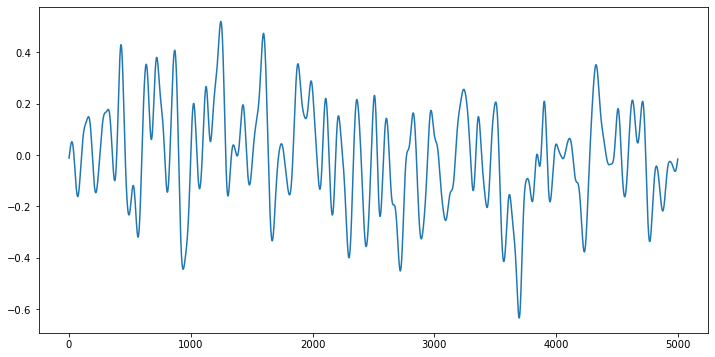

In [17]:
# Generate a signal and plot it
N = 5000
f = generator(N, sigma = 0.1)
fig = plt.figure(figsize = (12, 6))
plt.plot(f)

Time:           0.11920881271362305
Time with FFT:  0.001046895980834961


/Users/torn/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


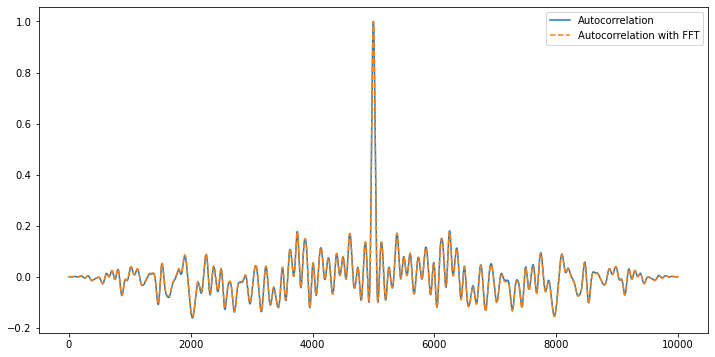

In [18]:
# Calculate autocorrelations using both methods,
# find the time it takes, and plot both in the same figure
fig = plt.figure(figsize = (12, 6))
tic = time()
c = autocorrelate(f)
toc = time()
print('Time:          ', toc - tic)

plt.plot(c, label = 'Autocorrelation')
tic = time()
c = autocorrelate_fft(f)
toc = time()
print('Time with FFT: ', toc - tic)

plt.plot(c, '--', label = 'Autocorrelation with FFT')
plt.legend()

## Image compression with Fourier transform

This type of compression would normally be done with Wavelet transforms, but the principle is the same with a Fourier transform.

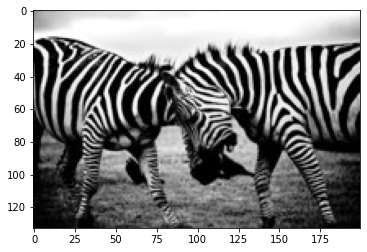

In [19]:
import matplotlib.image as mpimg


# The picture has a Creative Commons Licence,
# and is taken from http://picalls.com/fighting-zebras/
zebras = mpimg.imread('../files/zebras.jpg')
plt.imshow(zebras, cmap = plt.get_cmap('Greys_r'))

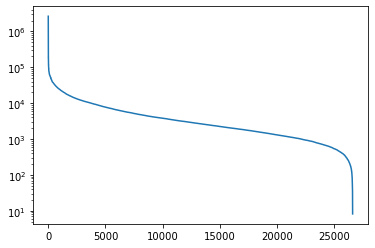

In [20]:
# Take Fourier transform, and plot the coefficients,
# from largest to smallest. A small fraction of the
# coefficients make up most of the "energy" in the picture.
zebras_fft = np.fft.fft2(zebras[:,:])
coefficients = sorted(abs(zebras_fft.reshape(133*200)))
plt.plot(coefficients[::-1])
plt.yscale('log')

Number of zero elements: 18869 of 26600


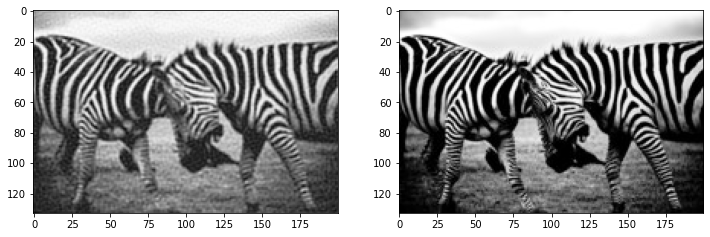

In [21]:
# Select a threshold, and set all the coefficients smaller
# than the threshold to zero.
threshold = 5000
zebras_fft_compressed = np.where(abs(zebras_fft) > threshold, zebras_fft, 0)

# Do the inverse Fourier transform on the ``compressed'' data,
# the plot both the original and the reconstruction.
zebras_compressed = np.fft.ifft2(zebras_fft_compressed)

fig, ax = plt.subplots(ncols = 2, figsize = (12, 4))
ax[0].imshow(zebras_compressed.real, cmap = plt.get_cmap('Greys_r'))
ax[1].imshow(zebras, cmap = plt.get_cmap('Greys_r'))

print('Number of zero elements: %s of %s' % (np.sum(abs(zebras_fft_compressed) == 0), zebras.size))